# Урок 7
Линейная регрессия. Однофакторный дисперсионный анализ
Домашнее задание

Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдём коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [3]:
b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
b1

2.620538882402766

In [4]:
b0 = y.mean() - b1 * x.mean()
b0

444.1773573243595

Найдём коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [5]:
x1 = pd.DataFrame({'x': x})
y1 = pd.DataFrame({'y': y})

In [6]:
ones = np.ones((x1.shape[0], 1))
x2 = np.hstack((ones, x1))
x2.shape

(10, 2)

In [7]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

In [8]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y1)

print(b)

[[444.17735732]
 [  2.62053888]]


Полученные коэффициенты примерно одинаковые.

Построим scatter plot по данным и отметим на нём прямую линейной регрессии, полученную в п. 1. 

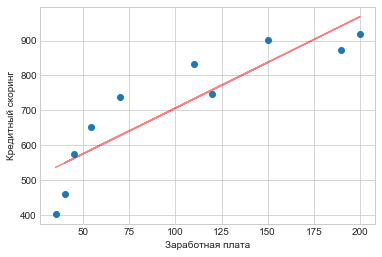

In [9]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг');

 Посчитаем коэффициент детерминации:

In [10]:
z = b0 + b1 * x
R1 = 1 - (z - y).var() / y.var()
R1

0.7876386635293685

Посчитаем среднюю ошибку аппроксимации:

In [11]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации"""
    return np.abs((y_real - y_pred) / y_real).mean()

In [12]:
mean_approximation_error(y, z)

0.11469251843561709

Оценим построенное уравнение регрессии с помощью F-критерия Фишера:

In [13]:
k1 = 1
k2 = len(x) - 2

F1 = (R1 / k1) / ((1 - R1) / k2)
F1

29.67164085966449

In [14]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем F>Fcrit
, поэтому уравнение регрессии статистически значимо.

Построим для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента:

In [15]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона"""
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [16]:
s_slope = standard_error_slope(x, y, z)
s_slope

0.4810827956851601

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$

In [17]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=k2)
t

2.3060041350333704

Доверительный интервал для параметра 
b1
:

In [18]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593724, 3.7299177985461593)

Аналогично для параметра 
𝑏
0

In [19]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига"""
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [20]:
s_intercept = standard_error_intercept(x, y, z)
s_intercept

56.46649755068154

Доверительный интервал для параметра 
b0
:

In [21]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816362, 574.3893341670828)

Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они практически не отличаются, постройте scatter plot по каждой паре выборок.

In [22]:
df = pd.DataFrame({"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], 
                   "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], 
                   "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], 
                   "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], 
                   "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], 
                   "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], 
                   "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], 
                   "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]})

In [23]:
print(df['x1'].mean(), df['x2'].mean(), df['x3'].mean(), df['x4'].mean())

9.0 9.0 9.0 9.0


In [24]:
print(df['y1'].mean(), df['y2'].mean(), df['y3'].mean(), df['y4'].mean())

7.500909090909093 7.500909090909091 7.500000000000001 7.50090909090909


In [25]:
print(df['x1'].var(ddof=1), df['x2'].var(ddof=1), df['x3'].var(ddof=1), df['x4'].var(ddof=1))

11.0 11.0 11.0 11.0


In [26]:
print(df['y1'].var(ddof=1), df['y2'].var(ddof=1), df['y3'].var(ddof=1), df['y4'].var(ddof=1))

4.127269090909091 4.127629090909091 4.12262 4.12324909090909


In [27]:
df[['x1', 'y1']].corr()

,x1,y1
x1,1.000000,0.816421
y1,0.816421,1.000000


In [28]:
df[['x2', 'y2']].corr()

,x2,y2
x2,1.000000,0.816237
y2,0.816237,1.000000


In [29]:
df[['x3', 'y3']].corr()

,x3,y3
x3,1.000000,0.816287
y3,0.816287,1.000000


In [30]:
df[['x4', 'y4']].corr()

,x4,y4
x4,1.000000,0.816521
y4,0.816521,1.000000


In [31]:
b11 = np.cov(df['x1'], df['y1'], ddof=0)[0, 1] / np.var(df['x1'], ddof=0)
b01 = df['y1'].mean() - b1 * df['x1'].mean()

In [32]:
b12 = np.cov(df['x2'], df['y2'], ddof=0)[0, 1] / np.var(df['x2'], ddof=0)
b02 = df['y2'].mean() - b1 * df['x2'].mean()

In [33]:
b13 = np.cov(df['x3'], df['y3'], ddof=0)[0, 1] / np.var(df['x3'], ddof=0)
b03 = df['y3'].mean() - b1 * df['x3'].mean()

In [34]:
b14 = np.cov(df['x4'], df['y4'], ddof=0)[0, 1] / np.var(df['x4'], ddof=0)
b04 = df['y4'].mean() - b1 * df['x4'].mean()

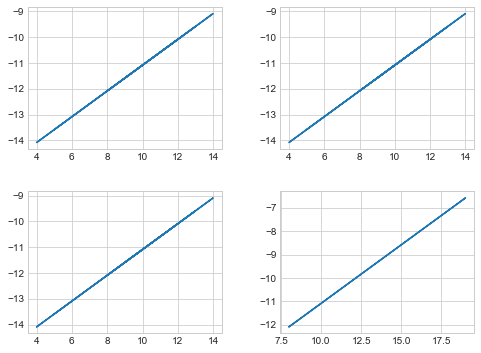

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(df['x1'], b01 + b11 * df['x1'])
ax2.plot(df['x2'], b02 + b12 * df['x2'])
ax3.plot(df['x3'], b03 + b13 * df['x3'])
ax4.plot(df['x4'], b04 + b14 * df['x4'])

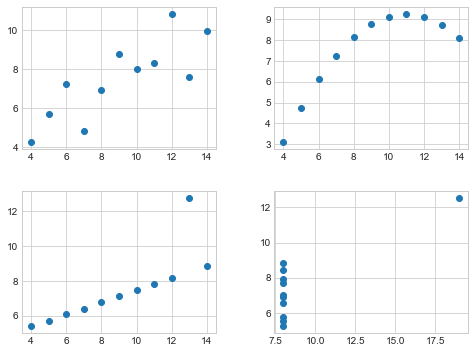

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.scatter(df['x1'], df['y1'])
ax2.scatter(df['x2'], df['y2'])
ax3.scatter(df['x3'], df['y3'])
ax4.scatter(df['x4'], df['y4'])